In [ ]:
#imporar librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import keras 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train_data_dir = '/content/drive/MyDrive/PI/Rosas/Rosas/train'  
validation_data_dir = '/content/drive/MyDrive/PI/Rosas/Rosas/test'

class_name = ['Sanas', 'Enfermas']

In [ ]:
#Parametros 
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Reescalamos las imágenes
    rotation_range=20,  # Rotación aleatoria
    zoom_range=0.2,  # Zoom aleatorio
    width_shift_range=0.2,  # Traslación horizontal aleatoria
    height_shift_range=0.2,  # Traslación vertical aleatoria
    horizontal_flip=True,
    vertical_flip=True,  # Volteo horizontal aleatorio
    preprocessing_function=preprocess_input, 
     fill_mode='nearest',
    data_format="channels_last")



valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale= 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(255, 255),
    batch_size=32,
    #class_mode='binary'
    )

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(255, 255),
    batch_size=32,
    #class_mode='binary'
    )

Found 251 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


Modelo


In [ ]:
from keras.layers import Dense, Flatten 
from keras.models import Model 

In [ ]:
base_model = VGG16(input_shape= (255, 255, 3), include_top= False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(2, activation= 'sigmoid')(X)

#Creacion del modelo 
model = Model(base_model.input,X)

In [ ]:
model.compile(optimizer='adam', 
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose= 1)

mc = ModelCheckpoint(filepath= 'best_model.h5', 
                     monitor = 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose=1, 
                     save_best_only= True)

cb= [es, mc]

In [ ]:
his = model.fit(train_generator,
                          epochs= 50,
                          #verbose= 1, 
                          #callbacks=cb,
                          validation_data= validation_generator,
                          steps_per_epoch=int(201/32),
                          validation_steps=int(201/32))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 204s 35s/step - loss: 0.8330 - accuracy: 0.5080 - val_loss: 0.6275 - val_accuracy: 0.6719
Epoch 2/50
6/6 [==============================] - 61s 11s/step - loss: 0.6343 - accuracy: 0.6631 - val_loss: 0.5066 - val_accuracy: 0.7708
Epoch 3/50
6/6 [==============================] - 45s 8s/step - loss: 0.5526 - accuracy: 0.7380 - val_loss: 0.5355 - val_accuracy: 0.7344
Epoch 4/50
6/6 [==============================] - 44s 8s/step - loss: 0.4978 - accuracy: 0.7969 - val_loss: 0.4780 - val_accuracy: 0.7552
Epoch 5/50
6/6 [==============================] - 44s 8s/step - loss: 0.5095 - accuracy: 0.7487 - val_loss: 0.4724 - val_accuracy: 0.7812
Epoch 6/50
6/6 [==============================] - 43s 8s/step - loss: 0.5008 - accuracy: 0.7433 - val_loss: 0.4211 - val_accuracy: 0.8021
Epoch 7/50
6/6 [==============================] - 44s 8s/step - loss: 0.4077 - accuracy: 0.7968 - val_loss: 0.4167 - val_accuracy: 0.8125
Epoch 8/50
6/6 [==========================

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

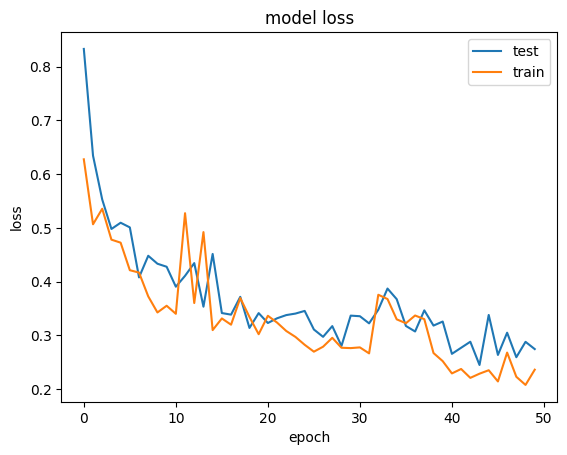

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score, auc, roc_curve,precision_score, precision_recall_curve

p = model.predict(validation_generator)
p

8/8 [==============================] - 25s 3s/step


array([[9.76401508e-01, 3.23993973e-02],
       [9.93979931e-01, 7.12700374e-03],
       [8.36827576e-01, 1.75769687e-01],
       [4.34604347e-01, 6.74350321e-01],
       [5.38816094e-01, 5.81047714e-01],
       [1.40603147e-02, 9.83303785e-01],
       [2.01050445e-01, 7.70525217e-01],
       [6.76062942e-01, 3.34275723e-01],
       [3.66240740e-01, 6.07289374e-01],
       [8.89400363e-01, 1.28827214e-01],
       [8.59840214e-02, 9.46868777e-01],
       [7.93397784e-01, 2.43077293e-01],
       [2.62108833e-01, 7.79515445e-01],
       [7.47381687e-01, 2.79421151e-01],
       [9.92065728e-01, 9.25560854e-03],
       [2.94817865e-01, 6.96785867e-01],
       [8.58514905e-02, 9.16178703e-01],
       [5.09033680e-01, 4.74470079e-01],
       [6.09746158e-01, 4.64253634e-01],
       [2.16647442e-02, 9.81949031e-01],
       [8.65790155e-03, 9.94525969e-01],
       [3.98372650e-01, 5.96466422e-01],
       [2.46299226e-02, 9.72263098e-01],
       [9.40778553e-01, 9.07402635e-02],
       [7.058736

In [ ]:
from keras.models import load_model


model = load_model("/content/drive/MyDrive/PI/best_model.h5")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score, auc, roc_curve,precision_score, precision_recall_curve

In [ ]:
# Calcular métricas con sklearn.metrics
y_true = validation_generator.classes
y_pred = p
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.5099601593625498
Precision: 0.5076923076923077
Recall: 0.528
F1 Score: 0.5176470588235295


In [ ]:
import cv2
width_shape = 255
height_shape = 255